# Javier EPAC cyclone case 
### Brian Mapes Feb 2023
#### 15-minute frame separation

In [1]:
from openpiv import tools, pyprocess, validation, filters, scaling 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import imageio

from scipy.ndimage import gaussian_filter as smoo

In [194]:
# 15-minute spacing
!ls DATA/TCJavier_California_2018

Javier_waves_20160808_FAST.gif frame_00021.png
frame_00000.png                frame_00022.png
frame_00001.png                frame_00023.png
frame_00002.png                frame_00024.png
frame_00003.png                frame_00025.png
frame_00004.png                frame_00026.png
frame_00005.png                frame_00027.png
frame_00006.png                frame_00028_hasoffset.png
frame_00007.png                frame_00029.png
frame_00008.png                frame_00030.png
frame_00009.png                frame_00031.png
frame_00010.png                frame_00032.png
frame_00011.png                frame_00033.png
frame_00012.png                frame_00034.png
frame_00013.png                frame_00035.png
frame_00014.png                frame_00036.png
frame_00015.png                frame_00037.png
frame_00016.png                frame_00038.png
frame_00017.png                frame_00039.png
frame_00018.png                frame_00040.png
frame_00019.png                frame_00041.png
fra

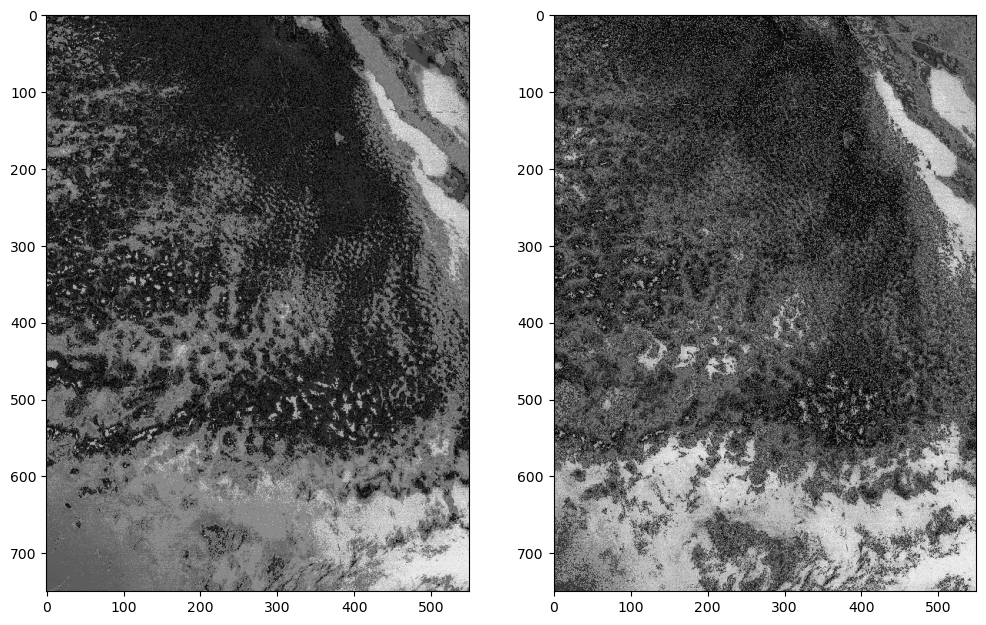

In [174]:
# midday, frames are 15 minutes apart 
frame_a  = tools.imread('DATA/TCJavier_California_2018/frame_00025.png')[0:750,50:600]
frame_b  = tools.imread('DATA/TCJavier_California_2018/frame_00027.png')[0:750,50:600]

fig,ax = plt.subplots(1,2,figsize=(12,10))
ax[0].imshow(1.0*frame_a,cmap=plt.cm.gray)
ax[1].imshow(1.0*frame_b,cmap=plt.cm.gray)

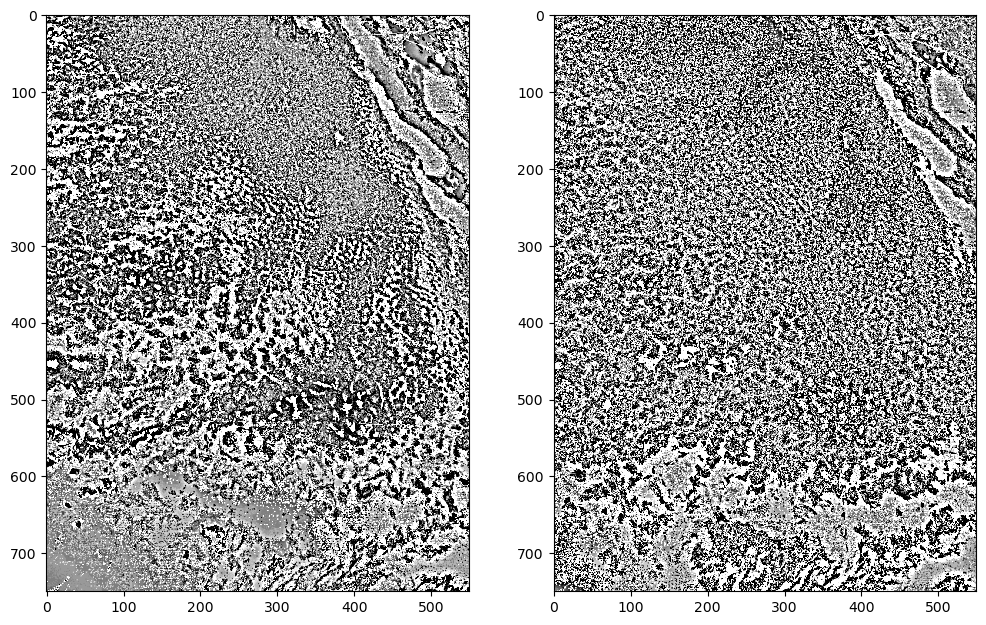

In [176]:
# High pass the images to make sure the tracking is not of wave velocity itself
# 1.0* makes a floating point array
frame_a_hp = 1.0*frame_a.copy() - smoo(frame_a, 4)
frame_b_hp = 1.0*frame_b.copy() - smoo(frame_b, 4)

fig,ax = plt.subplots(1,2,figsize=(12,10))
ax[0].imshow(frame_a_hp,cmap=plt.cm.gray, clim=[-5,5])
ax[1].imshow(frame_b_hp,cmap=plt.cm.gray, clim=[-5,5])

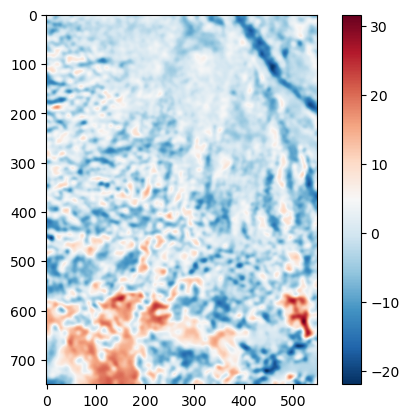

In [208]:
# simple difference 
diff = 1.0*frame_b-frame_a
plt.imshow( smoo(diff-diff.mean(),4), cmap='RdBu_r'); plt.colorbar()

In [178]:
winsize = 36 # pixels, interrogation window size in frame A
searchsize = 36  # pixels, search in image B big enough to contain credible velocity 
overlap = 18 # pixels, 50% overlap if half of winsize
dt = 1 # time interval between images, converts pixel displacement to velocity

# Coordinates of velocity positions in image array
x, y = pyprocess.get_coordinates(image_size=frame_a.shape, 
                                 search_area_size=searchsize, 
                                 overlap=overlap )

In [179]:
# Use high-pass images as the PIV source frame_a_hp, frame_b_hp

u, v, sig2noise = pyprocess.extended_search_area_piv(  frame_a_hp.astype(np.int32), 
                                                       frame_b_hp.astype(np.int32), 
                                                       window_size=winsize, 
                                                       overlap=overlap, 
                                                       dt=dt, 
                                                       search_area_size=searchsize, 
                                                       sig2noise_method='peak2mean')
# return u/dt, v/dt, sig2noise

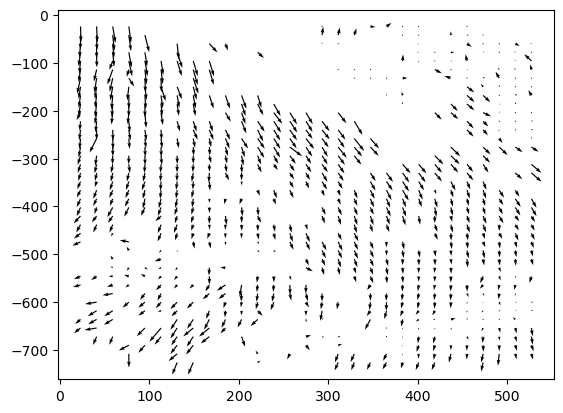

In [193]:
plt.quiver(x,-y, u,-v)

## Couple problems evident. 

1. zeroes (subpixel values) 
2. outliers from local values

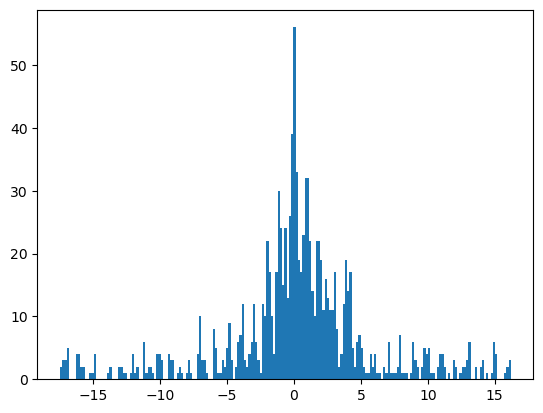

In [181]:
plt.hist(u.ravel(),201);  # units are pixels

# Clobber large vectors 
# u, v, mask = validation.global_val(u, v, [-15,10], [-10,10])

In [182]:
# Median filter: anything beyond 4 pixels/interval from a 3x3 median 
u,v,mask = validation.local_median_val(u, v, 4, 4, size=3)

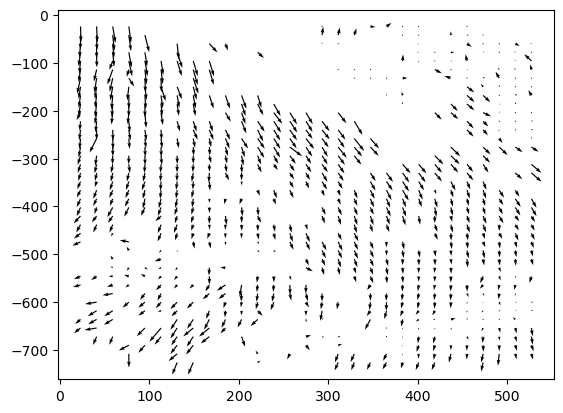

In [183]:
plt.quiver(x,-y, u,-v)

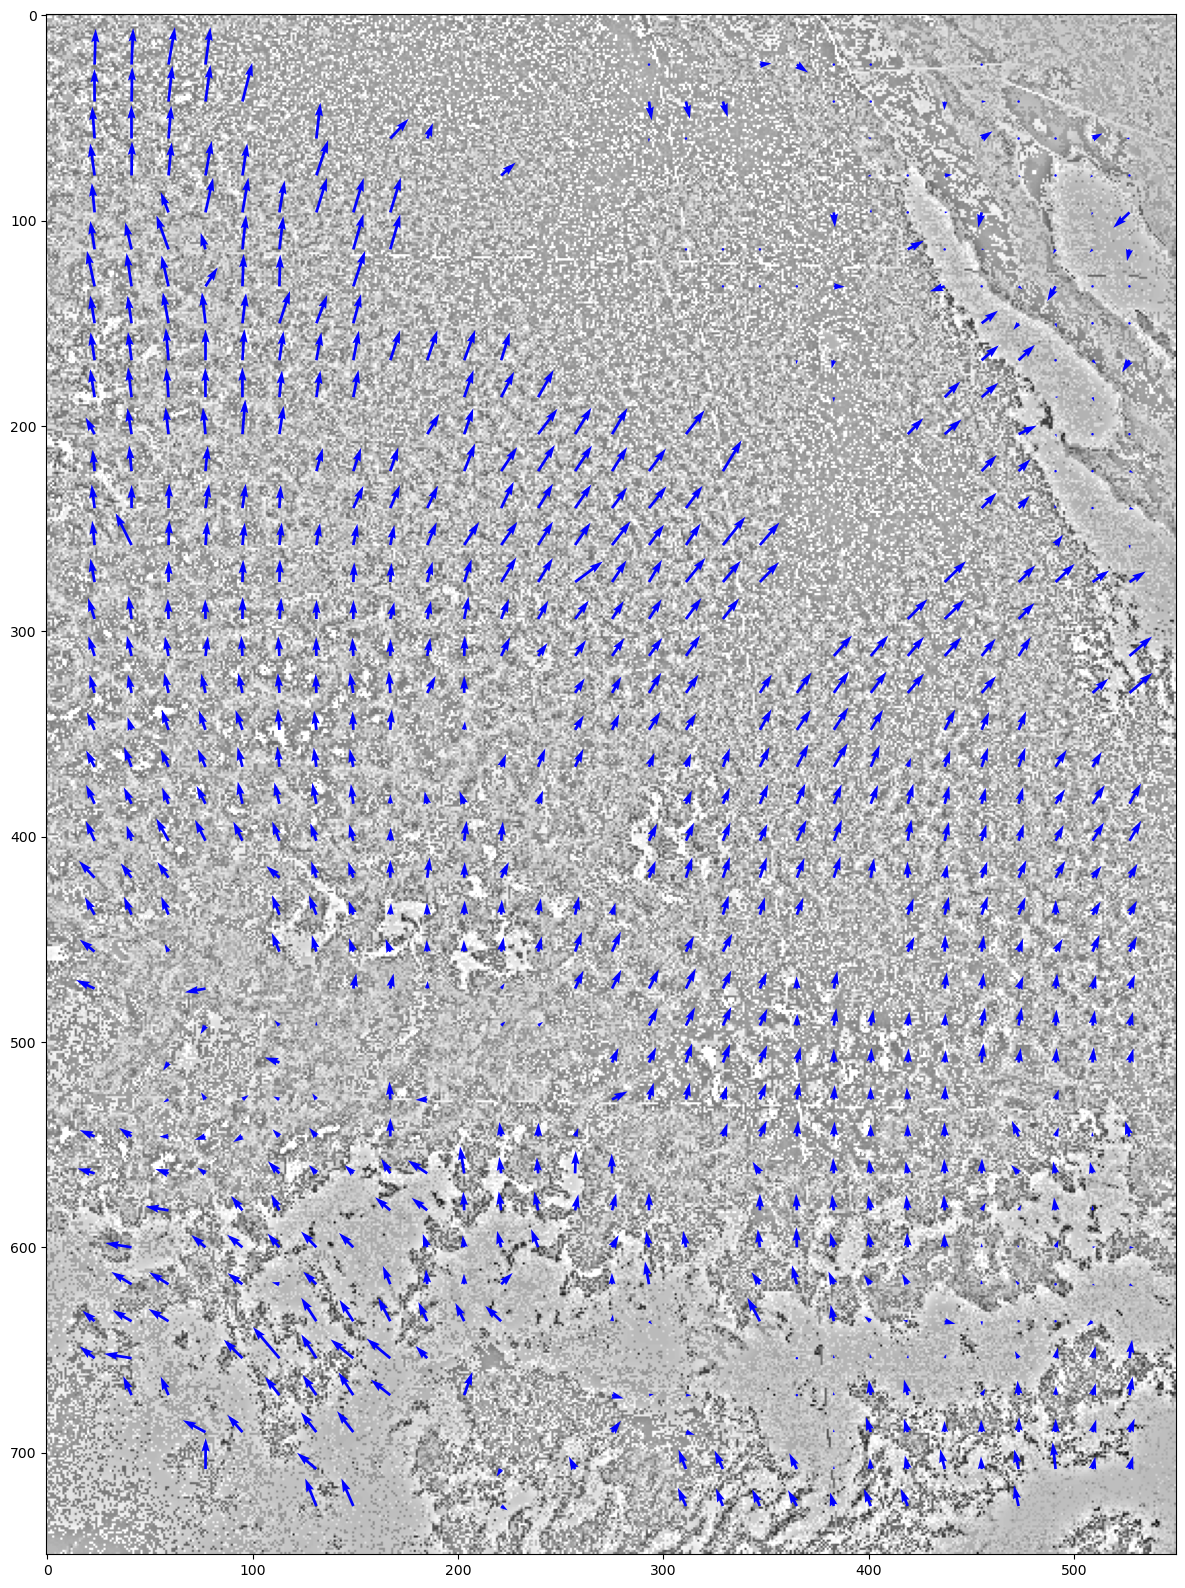

In [190]:
plt.figure(figsize=(15,20))

plt.imshow(frame_b_hp,cmap=plt.cm.gray, clim=[-50,20])   #-frame_a)
plt.quiver(x,y, u,v, color='b')